<a href="https://colab.research.google.com/github/Juanitam06/Intro_Geopandas/blob/main/Tallermapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller
Crear un mapa de coropletas de la localidad donde vivimos y sus barrios para el lunes 6 de mayo y traerlo en pdf


In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
comunas = gpd.read_file ("/content/drive/MyDrive/BarriosSoacha.geojson")
comunas

,FID,OBJECTID_1,HECTARES,NOM_BARRIO,COM_MAPA,geometry
0,1,1,22.454545,LA DESPENSA,3,"POLYGON ((-8258531.800 512036.303, -8258988.39..."
1,2,2,13.542198,JULIO RINCON I,4,"POLYGON ((-8258494.643 510904.428, -8258487.79..."
2,3,3,62.797715,ZONA INDUSTRIAL DE CAZUCA,5,"MULTIPOLYGON (((-8259031.362 511630.358, -8259..."
3,4,4,1.757713,SANTILLANA,5,"POLYGON ((-8258543.642 511232.126, -8258541.25..."
4,5,5,9.899998,VILLA SANDRA,4,"POLYGON ((-8258690.934 510220.751, -8258690.44..."
...,...,...,...,...,...,...
691,692,176,2.449988,SAN ANTONIO,6,"POLYGON ((-8261190.813 510152.148, -8261145.31..."
692,693,177,0.266384,SANTA MARIA I,6,"POLYGON ((-8261243.785 510124.351, -8261268.58..."
693,694,178,1.251607,COMFENALCO,6,"POLYGON ((-8261323.455 510256.309, -8261270.98..."
694,695,366,5.139647,SABANA CIPRES,6,"POLYGON ((-8260809.188 509699.693, -8260811.70..."


In [4]:
comunas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
comunas.to_crs(epsg=9377, inplace=True)
comunas

,FID,OBJECTID_1,HECTARES,NOM_BARRIO,COM_MAPA,geometry
0,1,1,22.454545,LA DESPENSA,3,"POLYGON ((4868309.147 2065826.442, 4867853.894..."
1,2,2,13.542198,JULIO RINCON I,4,"POLYGON ((4868344.307 2064706.273, 4868351.116..."
2,3,3,62.797715,ZONA INDUSTRIAL DE CAZUCA,5,"MULTIPOLYGON (((4867810.803 2065425.547, 48678..."
3,4,4,1.757713,SANTILLANA,5,"POLYGON ((4868296.030 2065030.646, 4868298.400..."
4,5,5,9.899998,VILLA SANDRA,4,"POLYGON ((4868147.632 2064030.020, 4868148.122..."
...,...,...,...,...,...,...
691,692,176,2.449988,SAN ANTONIO,6,"POLYGON ((4865657.013 2063966.294, 4865702.332..."
692,693,177,0.266384,SANTA MARIA I,6,"POLYGON ((4865604.193 2063938.874, 4865579.443..."
693,694,178,1.251607,COMFENALCO,6,"POLYGON ((4865525.042 2064069.598, 4865577.206..."
694,695,366,5.139647,SABANA CIPRES,6,"POLYGON ((4866036.455 2063517.891, 4866033.948..."


In [6]:
comunas.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

###Luego de cambiar el sistema EPSG al de Colombia es necesario (en este caso) modificar el geodataset solo con los datos de la comuna dos de soacha que es la "localidad" a trabajar.

In [10]:
ColumnaComunas= 'COM_MAPA'

numComuna= ['2']

comunas= comunas[comunas[ColumnaComunas].isin(numComuna)]

comunas

,FID,OBJECTID_1,HECTARES,NOM_BARRIO,COM_MAPA,geometry
125,126,126,3.725447,EL PRADO DE LAS VEGAS,2,"POLYGON ((4864736.413 2065445.382, 4864736.626..."
126,127,127,3.414515,PORTALEGRE,2,"POLYGON ((4864924.832 2064827.081, 4864732.926..."
127,128,128,1.553156,TEQUENDAMA,2,"POLYGON ((4864941.174 2064757.187, 4864747.422..."
128,129,129,8.953887,CENTRO,2,"POLYGON ((4865110.959 2064693.159, 4864987.557..."
129,130,130,11.642875,LINCONL,2,"POLYGON ((4865280.965 2064711.158, 4865278.677..."
...,...,...,...,...,...,...
678,679,673,1.310725,EL ENCANTO II,2,"POLYGON ((4864832.809 2065044.541, 4864824.236..."
680,681,684,2.521658,GRATITUD III MZ 1 - 3,2,"POLYGON ((4864703.599 2065240.985, 4864703.656..."
681,682,685,0.000000,LA ALEGRIA V MZ 7,2,"POLYGON ((4864539.631 2065353.550, 4864659.507..."
683,684,687,0.000000,EL ENCANTO IV MZ 8,2,"POLYGON ((4864548.286 2065457.305, 4864548.325..."


In [18]:
comunas["Area"]= comunas.area/10000
comunas

,FID,OBJECTID_1,HECTARES,NOM_BARRIO,COM_MAPA,geometry,Area
125,126,126,3.725447,EL PRADO DE LAS VEGAS,2,"POLYGON ((4864736.413 2065445.382, 4864736.626...",3.718142
126,127,127,3.414515,PORTALEGRE,2,"POLYGON ((4864924.832 2064827.081, 4864732.926...",3.407819
127,128,128,1.553156,TEQUENDAMA,2,"POLYGON ((4864941.174 2064757.187, 4864747.422...",1.550110
128,129,129,8.953887,CENTRO,2,"POLYGON ((4865110.959 2064693.159, 4864987.557...",8.936324
129,130,130,11.642875,LINCONL,2,"POLYGON ((4865280.965 2064711.158, 4865278.677...",11.620012
...,...,...,...,...,...,...,...
678,679,673,1.310725,EL ENCANTO II,2,"POLYGON ((4864832.809 2065044.541, 4864824.236...",1.308155
680,681,684,2.521658,GRATITUD III MZ 1 - 3,2,"POLYGON ((4864703.599 2065240.985, 4864703.656...",2.431898
681,682,685,0.000000,LA ALEGRIA V MZ 7,2,"POLYGON ((4864539.631 2065353.550, 4864659.507...",1.459401
683,684,687,0.000000,EL ENCANTO IV MZ 8,2,"POLYGON ((4864548.286 2065457.305, 4864548.325...",1.724863


<Axes: >

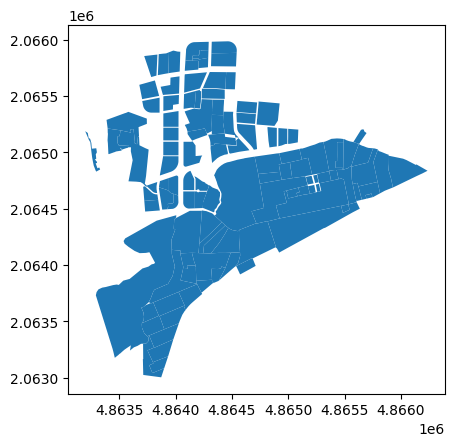

In [15]:
comunas.plot()

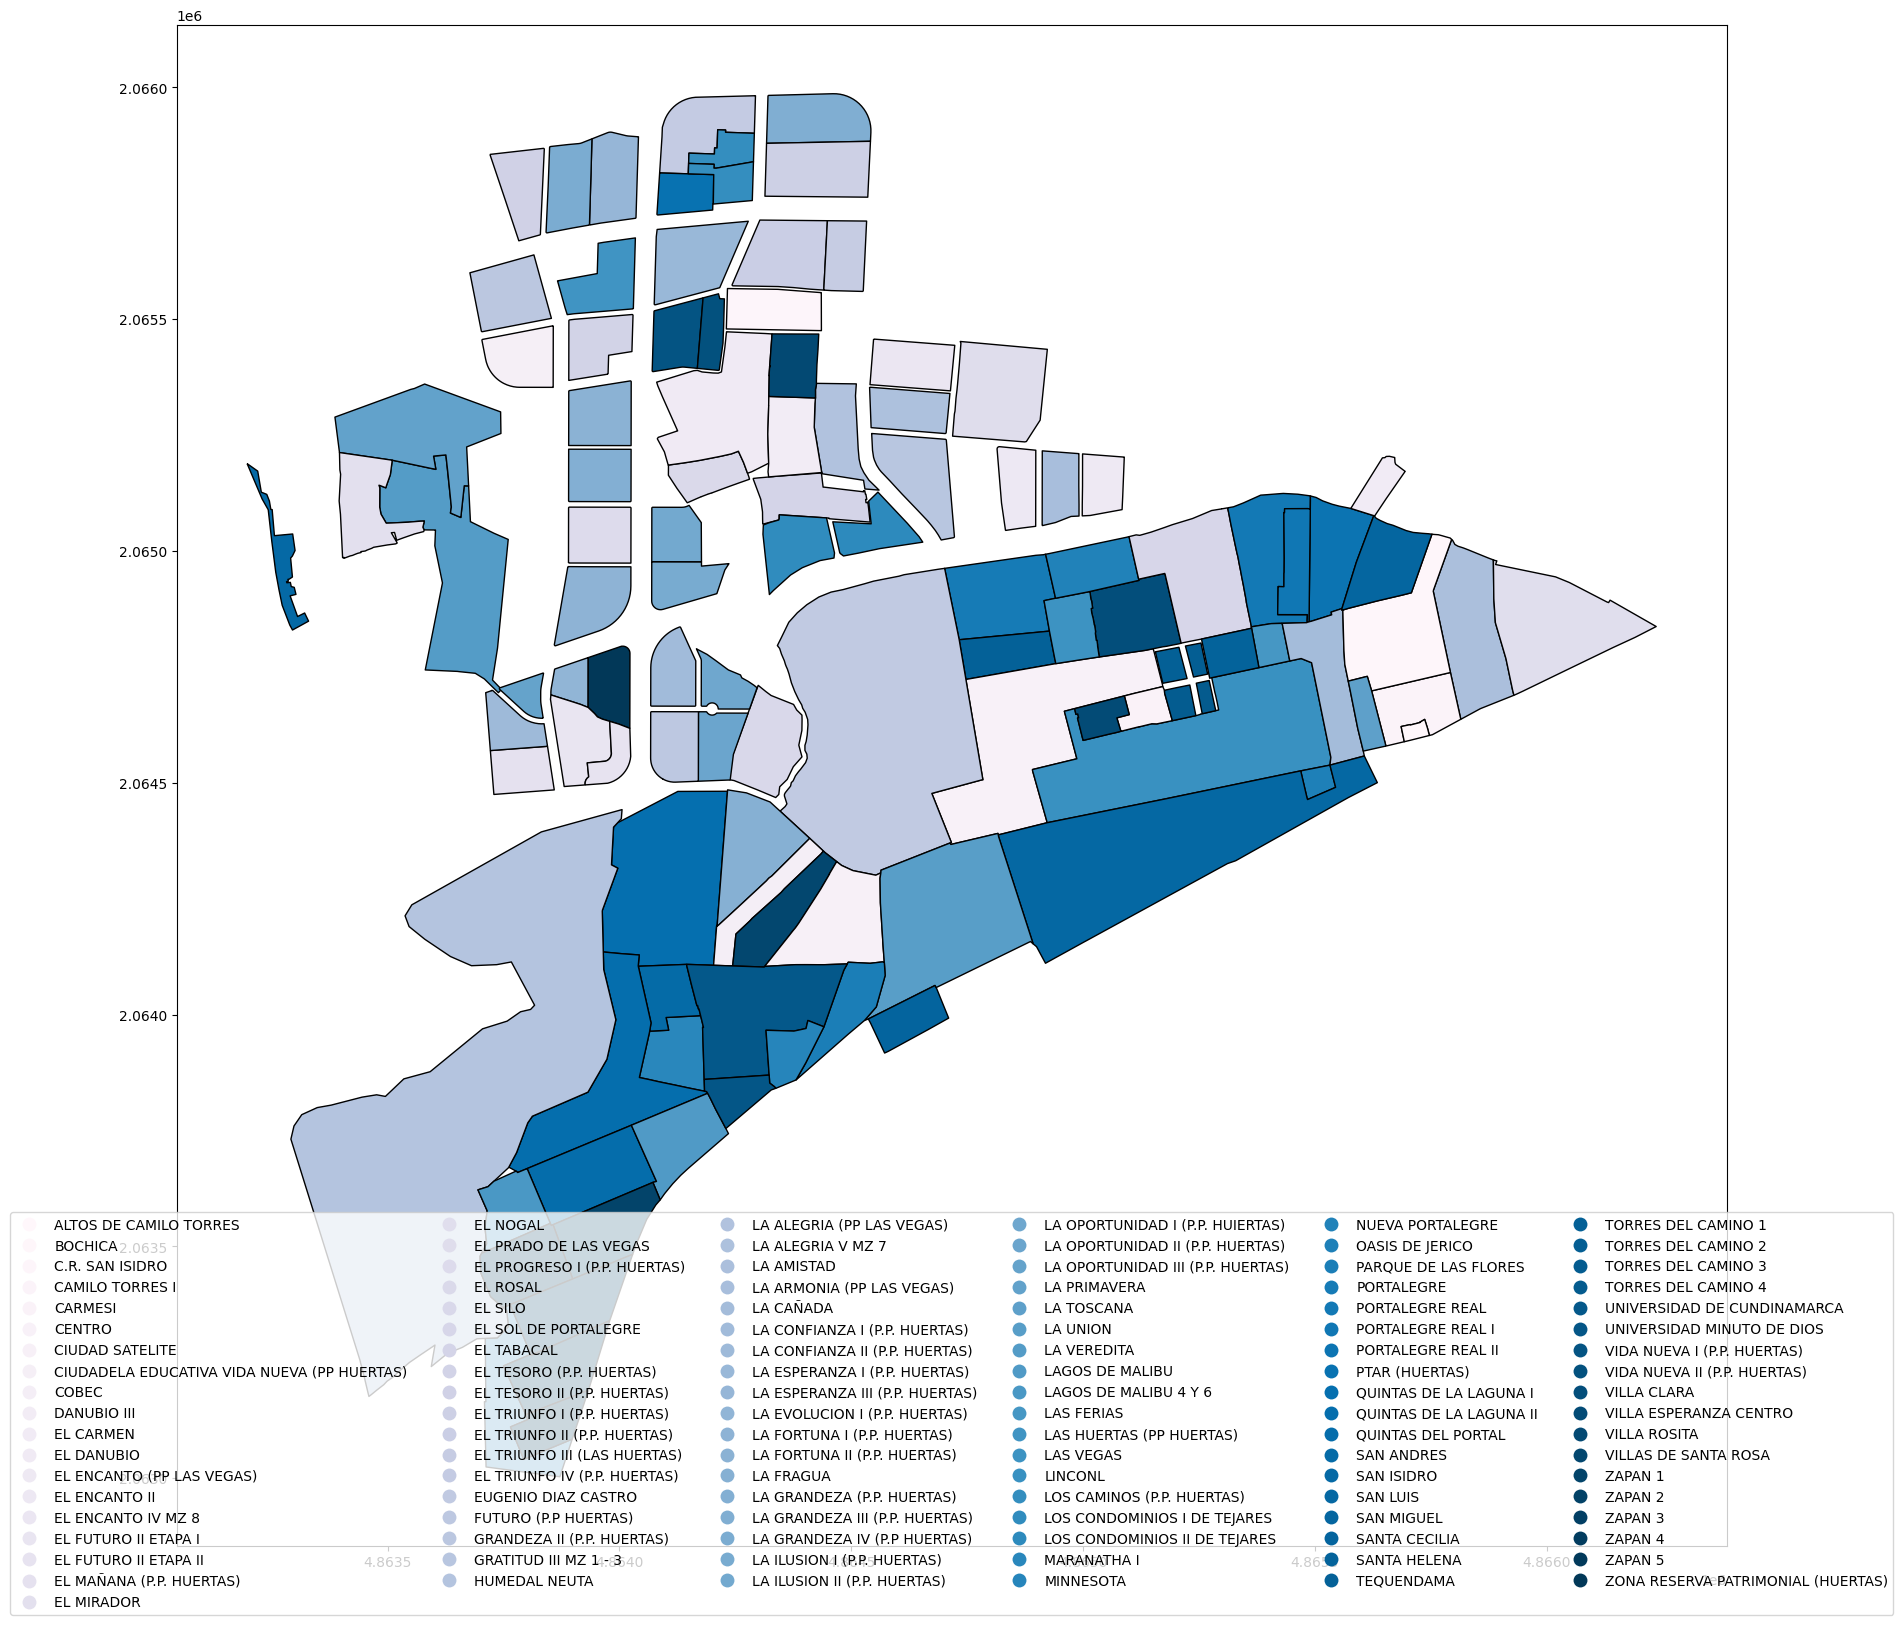

In [35]:
mapaC = comunas.plot(
    column='NOM_BARRIO',
    figsize=(20,20),
    edgecolor='black',
    cmap='PuBu',
    legend=True,
    legend_kwds= {
        'loc': 'lower center',
        'bbox_to_anchor': (0.5, -0.05),  # Ajuste de la posición de la leyenda
        'ncol': 6  # Distribución horizontal de la leyenda
    }
)
plt.savefig('/content/drive/My Drive/mapa.pdf') #guardar el mapa en un pdf